In [1]:
#Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Loading training and testing datasets

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#Quick overview of training dataset

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


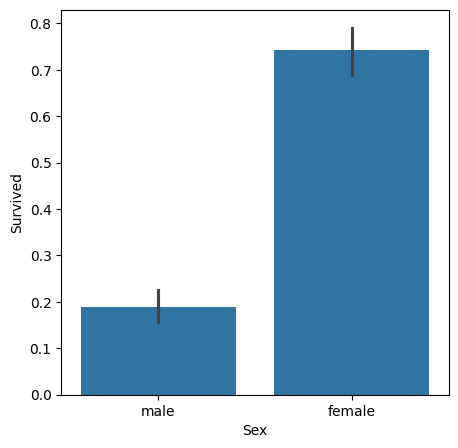

In [4]:
#Barplot that shows, how much percent male and female survived 

plt.figure(figsize=(5,5))
sns.barplot(data=train_df,x='Sex',y='Survived')
plt.show()

In [5]:
#Replacing all NaN values in column 'Embarked' with most frequently - 'S'

train_df['Embarked'].replace(np.nan,'S',inplace=True)

In [6]:
#177 values in column 'Age' ar Nan and 687 values in column 'Cabin' are missing

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
#Imputing 'Age' by K-nearest neighbor imputer with 'n' = 2

impute_knn = KNNImputer(n_neighbors=2)
age_complete_train= impute_knn.fit_transform(train_df[['Age']])
age_complete_test = impute_knn.fit_transform(test_df[['Age']])

In [8]:
train_df['AgeFull'] = age_complete_train
test_df['AgeFull'] = age_complete_test

In [9]:
train_df.drop(columns='Age',inplace=True)
test_df.drop(columns='Age',inplace=True)

In [10]:
y = train_df['Survived']
features = ['Pclass','Sex','SibSp','Parch','Embarked']
X = pd.get_dummies(train_df[features])

In [11]:
X['AgeFull'] = age_complete_train
X = preprocessing.StandardScaler().fit_transform(X)

In [12]:
X_test = pd.get_dummies(test_df[features])

In [13]:
X_test['AgeFull'] = age_complete_test
X_test = preprocessing.StandardScaler().fit_transform(X_test)

In [14]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2',],
             'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv = 10)
logreg_cv.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [15]:
print('Best params: ', logreg_cv.best_params_)
print('Best accuracy: ', logreg_cv.best_score_)

Best params:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy:  0.7979900124843946


In [16]:
parametersKNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN,parametersKNN,cv=10)
knn_cv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [17]:
print('Best params are: ', knn_cv.best_params_)
print('Best accuracy is: ', knn_cv.best_score_)

Best params are:  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 2}
Best accuracy is:  0.8159176029962547


In [18]:
parametersTR = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,parametersTR,cv=10)
tree_cv.fit(X,y)

C:\Users\Petr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Petr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Petr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Petr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [19]:
print('Best params are: ', tree_cv.best_params_)
print('Best acurracy is: ', tree_cv.best_score_)

Best params are:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best acurracy is:  0.8260424469413232


In [20]:
paramsRFC ={'n_estimators': [100,90,80,70,60,50],
            'max_depth': [1,2,3,4,5],
            'criterion':['gini','entropy','log_loss']}

model = RandomForestClassifier()
rfc_cv = GridSearchCV(model,paramsRFC,cv=10)
rfc_cv.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 90, 80, 70, 60, 50]})

In [21]:
print(rfc_cv.best_params_)
print(rfc_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 90}
0.8294007490636703


In [22]:
paramsSVC = {'C':[1.0,0.1,0.5,0.8],
             'kernel':['rbf','poly','sigmoid'],
             'degree':[3,4,2]}
svc = SVC()
svc_cv = GridSearchCV(svc,paramsSVC,cv=10)
svc_cv.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 0.1, 0.5, 0.8], 'degree': [3, 4, 2],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [23]:
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 0.8, 'degree': 3, 'kernel': 'rbf'}
0.8271410736579276


In [24]:
predictions = rfc_cv.predict(X_test)

In [25]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId,'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
